In [2]:
import os
import zipfile
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [20]:
os.listdir("{getcwd()}/../../../../Kaggle")
os.listdir("{getcwd()}/../../../Kaggle")

['tmp']

In [17]:
path_dogs_and_cats = f"{getcwd()}/../../../../Kaggle/dogs_and_cats.zip" 
origin_path = "{getcwd()}/../../../Kaggle/tmp" #github 폴더 밑에 Kaggle
local_zip = path_dogs_and_cats 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(origin_path)
zip_ref.close()

Origin_path / dataset 하위에 training set폴더와 test set폴더가 각각 존재.

In [53]:
print(os.listdir(origin_path+'/dataset/training_set'))
print(os.listdir(origin_path+'/dataset/test_set'))
print(len(os.listdir(origin_path+'/dataset/training_set/dogs')))
print(len(os.listdir(origin_path+'/dataset/test_set/dogs')))

['cats', 'dogs']
['cats', 'dogs']
4000
1000


In [54]:
TRAINING_DIR = origin_path+'/dataset/training_set'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=20, class_mode='binary', target_size=(300,300))

VALIDATION_DIR = origin_path+'/dataset/test_set'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=20, class_mode='binary', target_size=(300,300))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


3-layer 의 CNN 모델 이용.

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), input_shape=(300, 300, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 8)       224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 16)      1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 39200)            

In [56]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
400/400 [==============================] - 365s 913ms/step - loss: 0.6682 - acc: 0.6560 - val_loss: 0.5422 - val_acc: 0.7260
Epoch 2/5
400/400 [==============================] - 348s 869ms/step - loss: 0.5117 - acc: 0.7498 - val_loss: 0.5450 - val_acc: 0.7415
Epoch 3/5
400/400 [==============================] - 334s 836ms/step - loss: 0.4166 - acc: 0.8092 - val_loss: 0.5865 - val_acc: 0.7285
Epoch 4/5
400/400 [==============================] - 350s 875ms/step - loss: 0.3094 - acc: 0.8704 - val_loss: 0.6539 - val_acc: 0.7575
Epoch 5/5
400/400 [==============================] - 342s 855ms/step - loss: 0.2188 - acc: 0.9171 - val_loss: 0.8999 - val_acc: 0.7285


Text(0.5, 1.0, 'Training and validation loss')

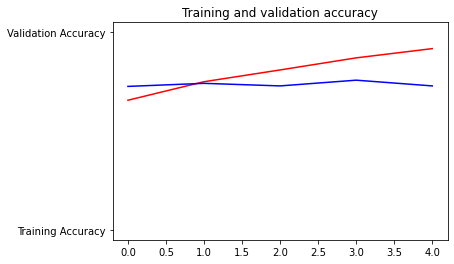

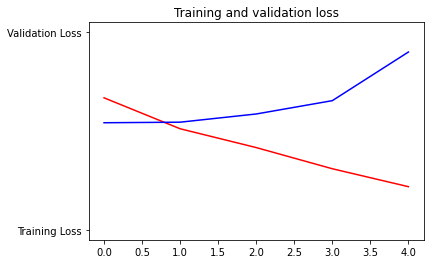

In [57]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)